In [1]:
from contextlib import contextmanager
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.patches import Arc
from matplotlib.patches import FancyBboxPatch
import matplotlib.transforms as mtransforms

import numpy as np
from io import BytesIO
import base64

%matplotlib inline

In [2]:
color = 'orangered'
blue = 'royalblue'
darkmode = '#bbbbcc'

def makefig(frame=False):
    plt.figure(figsize=(1,1), dpi=100)
    if not frame:
        plt.axis('off');
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1)  

def tobase64():
    buf = BytesIO()
    plt.savefig(buf, format='svg', transparent=True)
    fig64 = base64.b64encode(buf.getvalue())
    return fig64

pngstrings = {}

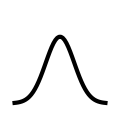

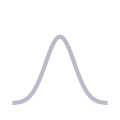

In [3]:
makefig()
x = np.linspace(-4.5,4.5,50)
y = np.exp(-x**2/4)
plt.plot(x, y, lw=3, color='black')
plt.ylim(-.1, 1.4);
pngstrings['normal'] = tobase64()

makefig()
plt.plot(x, y, lw=3, color=darkmode)
plt.ylim(-.1, 1.4);
pngstrings['normal_dark'] = tobase64()

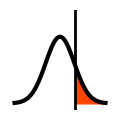

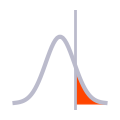

In [4]:
makefig()
limit = 1.5

x = np.linspace(-4.5,4.5,50)
y = np.exp(-x**2/4)
plt.plot(x, y, lw=3, color='black')
plt.axvline(limit, color='black', lw=2)
plt.fill_between(x, y, where=(x>limit), color=color)
plt.ylim(-.1, 1.4)
pngstrings['risk'] = tobase64()

makefig()
plt.plot(x, y, lw=3, color=darkmode)
plt.axvline(limit, color=darkmode, lw=2)
plt.fill_between(x, y, where=(x>limit), color=color)
plt.ylim(-.1, 1.4)
pngstrings['risk_dark'] = tobase64()

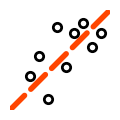

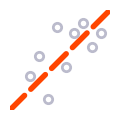

In [5]:
makefig()
np.random.seed(142941)

x = np.linspace(.2,1, num=10)
y = np.random.normal(loc=x, scale=.2)
plt.plot(x, y, marker='o', ls='', color='black', mew=2, markersize=6, mfc='none', mec='black')
plt.plot([0, 1], [0, 1], color=color, ls='--', lw=4, zorder=0, dash_capstyle='round');
plt.xlim(0,1)
plt.ylim(0,1)
pngstrings['curvefit'] = tobase64()

makefig()
plt.plot(x, y, marker='o', ls='', color=darkmode, mew=2, markersize=6, mfc='none', mec=darkmode)
plt.plot([0, 1], [0, 1], color=color, ls='--', lw=4, zorder=0, dash_capstyle='round');
plt.xlim(0,1)
plt.ylim(0,1)
pngstrings['curvefit_dark'] = tobase64()

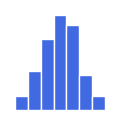

In [6]:
makefig()
np.random.seed(623460)
plt.hist(np.random.normal(size=100), bins=7, color=blue, edgecolor='white');
pngstrings['histogram'] = tobase64()
pngstrings['histogram_dark'] = tobase64()

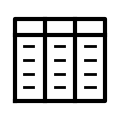

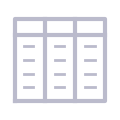

In [7]:
makefig()
bot = .1
plt.plot([0,1,1,0,0], [bot,bot,1,1,bot], color='black', lw=3)
plt.plot([.33, .33], [bot, 1], color='black', lw=3)
plt.plot([.66, .66], [bot, 1], color='black', lw=3)
plt.plot([0, 1], [.83, .83], color='black', lw=3)
plt.plot([.1, .2], [.7, .7], color='black', lw=2)
plt.plot([.1, .2], [.55, .55], color='black', lw=2)
plt.plot([.1, .2], [.4, .4], color='black', lw=2)
plt.plot([.1, .2], [.25, .25], color='black', lw=2)
plt.plot([.44, .54], [.7, .7], color='black', lw=2)
plt.plot([.44, .54], [.55, .55], color='black', lw=2)
plt.plot([.44, .54], [.4, .4], color='black', lw=2)
plt.plot([.44, .54], [.25, .25], color='black', lw=2)
plt.plot([.78, .88], [.7, .7], color='black', lw=2)
plt.plot([.78, .88], [.55, .55], color='black', lw=2)
plt.plot([.78, .88], [.4, .4], color='black', lw=2)
plt.plot([.78, .88], [.25, .25], color='black', lw=2)
plt.ylim(0,1.1)
pngstrings['table'] = tobase64()

makefig()
plt.plot([0,1,1,0,0], [bot,bot,1,1,bot], color=darkmode, lw=3)
plt.plot([.33, .33], [bot, 1], color=darkmode, lw=3)
plt.plot([.66, .66], [bot, 1], color=darkmode, lw=3)
plt.plot([0, 1], [.83, .83], color=darkmode, lw=3)
plt.plot([.1, .2], [.7, .7], color=darkmode, lw=2)
plt.plot([.1, .2], [.55, .55], color=darkmode, lw=2)
plt.plot([.1, .2], [.4, .4], color=darkmode, lw=2)
plt.plot([.1, .2], [.25, .25], color=darkmode, lw=2)
plt.plot([.44, .54], [.7, .7], color=darkmode, lw=2)
plt.plot([.44, .54], [.55, .55], color=darkmode, lw=2)
plt.plot([.44, .54], [.4, .4], color=darkmode, lw=2)
plt.plot([.44, .54], [.25, .25], color=darkmode, lw=2)
plt.plot([.78, .88], [.7, .7], color=darkmode, lw=2)
plt.plot([.78, .88], [.55, .55], color=darkmode, lw=2)
plt.plot([.78, .88], [.4, .4], color=darkmode, lw=2)
plt.plot([.78, .88], [.25, .25], color=darkmode, lw=2)
plt.ylim(0,1.1)
pngstrings['table_dark'] = tobase64()

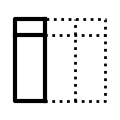

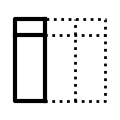

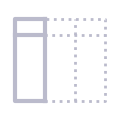

In [8]:
makefig()
bot = .1
plt.plot([0,1,1,0,0], [bot,bot,1,1,bot], color='black', lw=2, ls=':')
plt.plot([.66, .66], [bot, 1], color='black', lw=2, ls=':')
plt.plot([.0, 1], [.83, .83], color='black', lw=2, ls=':')
plt.plot([.33, .33], [bot, 1], color='black', lw=3)
plt.plot([.33, 0, 0, .33], [1, 1, bot, bot], color='black', lw=3)
plt.plot([0, .33], [.83, .83], color='black', lw=3)
plt.ylim(0,1.1)
pngstrings['column'] = tobase64()
display(plt.gcf())

makefig()
plt.plot([0,1,1,0,0], [bot,bot,1,1,bot], color=darkmode, lw=2, ls=':')
plt.plot([.66, .66], [bot, 1], color=darkmode, lw=2, ls=':')
plt.plot([.0, 1], [.83, .83], color=darkmode, lw=2, ls=':')
plt.plot([.33, .33], [bot, 1], color=darkmode, lw=3)
plt.plot([.33, 0, 0, .33], [1, 1, bot, bot], color=darkmode, lw=3)
plt.plot([0, .33], [.83, .83], color=darkmode, lw=3)
plt.ylim(0,1.1)
pngstrings['column_dark'] = tobase64()

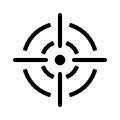

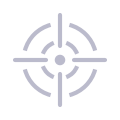

In [9]:
makefig()
plt.gca().add_patch(Arc((.5,.5), width=.4, height=.4, edgecolor='black', facecolor='none', lw=3,
    theta1=20, theta2=70))
plt.gca().add_patch(Arc((.5,.5), width=.4, height=.4, edgecolor='black', facecolor='none', lw=3,
    theta1=110, theta2=160))
plt.gca().add_patch(Arc((.5,.5), width=.4, height=.4, edgecolor='black', facecolor='none', lw=3,
    theta1=200, theta2=250))
plt.gca().add_patch(Arc((.5,.5), width=.4, height=.4, edgecolor='black', facecolor='none', lw=3,
    theta1=290, theta2=340))
plt.gca().add_patch(Arc((.5,.5), width=.8, height=.8, edgecolor='black', facecolor='none', lw=3,
    theta1=15, theta2=75))
plt.gca().add_patch(Arc((.5,.5), width=.8, height=.8, edgecolor='black', facecolor='none', lw=3,
    theta1=105, theta2=165))
plt.gca().add_patch(Arc((.5,.5), width=.8, height=.8, edgecolor='black', facecolor='none', lw=3,
    theta1=195, theta2=255))
plt.gca().add_patch(Arc((.5,.5), width=.8, height=.8, edgecolor='black', facecolor='none', lw=3,
    theta1=285, theta2=345))
plt.gca().add_patch(plt.Circle((.5,.5), radius=0.05, edgecolor='black', facecolor='black'))
plt.plot([0.5, 0.5], [.65, 1], color='black', lw=3, solid_capstyle='round')
plt.plot([0.5, 0.5], [.35, 0], color='black', lw=3, solid_capstyle='round')
plt.plot([0, 0.35], [.5, .5], color='black', lw=3, solid_capstyle='round')
plt.plot([0.65, 1], [.5, .5], color='black', lw=3, solid_capstyle='round')
pngstrings['target'] = tobase64()

makefig()
plt.gca().add_patch(Arc((.5,.5), width=.4, height=.4, edgecolor=darkmode, facecolor='none', lw=3,
    theta1=20, theta2=70))
plt.gca().add_patch(Arc((.5,.5), width=.4, height=.4, edgecolor=darkmode, facecolor='none', lw=3,
    theta1=110, theta2=160))
plt.gca().add_patch(Arc((.5,.5), width=.4, height=.4, edgecolor=darkmode, facecolor='none', lw=3,
    theta1=200, theta2=250))
plt.gca().add_patch(Arc((.5,.5), width=.4, height=.4, edgecolor=darkmode, facecolor='none', lw=3,
    theta1=290, theta2=340))
plt.gca().add_patch(Arc((.5,.5), width=.8, height=.8, edgecolor=darkmode, facecolor='none', lw=3,
    theta1=15, theta2=75))
plt.gca().add_patch(Arc((.5,.5), width=.8, height=.8, edgecolor=darkmode, facecolor='none', lw=3,
    theta1=105, theta2=165))
plt.gca().add_patch(Arc((.5,.5), width=.8, height=.8, edgecolor=darkmode, facecolor='none', lw=3,
    theta1=195, theta2=255))
plt.gca().add_patch(Arc((.5,.5), width=.8, height=.8, edgecolor=darkmode, facecolor='none', lw=3,
    theta1=285, theta2=345))
plt.gca().add_patch(plt.Circle((.5,.5), radius=0.05, edgecolor=darkmode, facecolor=darkmode))
plt.plot([0.5, 0.5], [.65, 1], color=darkmode, lw=3, solid_capstyle='round')
plt.plot([0.5, 0.5], [.35, 0], color=darkmode, lw=3, solid_capstyle='round')
plt.plot([0, 0.35], [.5, .5], color=darkmode, lw=3, solid_capstyle='round')
plt.plot([0.65, 1], [.5, .5], color=darkmode, lw=3, solid_capstyle='round')
pngstrings['target_dark'] = tobase64()

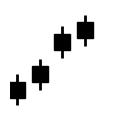

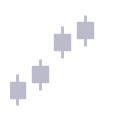

In [10]:
makefig()
np.random.seed(234234)
x = np.arange(0,4)
y = np.random.normal(x, scale=.4)*.75
plt.errorbar(x, y, yerr=.5, color='black', 
             lw=2, capthick=2, capsize=0, markersize=12, marker='s', ls='')
plt.xlim(-.3,4.1)
pngstrings['boxplot'] = tobase64()

makefig()
plt.errorbar(x, y, yerr=.5, color=darkmode, 
             lw=2, capthick=2, capsize=0, markersize=12, marker='s', ls='')
plt.xlim(-.3,4.1)
pngstrings['boxplot_dark'] = tobase64()

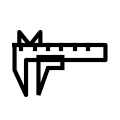

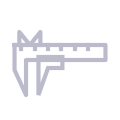

In [11]:
makefig()

# Outline
plt.plot([0,   .95,  .95,  .12, .12, 0, 0],
         [.25, .25, .1, .1, -.25, -0, .25],
         lw=3, color='black')

# Slider
a = np.array([[.25, .25, .35, .5,   .5, .25],
             [.12, -.25, .02,  .02, .13, .13]]).transpose()
p = plt.Polygon(a, edgecolor='black', lw=3, facecolor='none', zorder=10)

# Inner-diameter calipers
plt.plot([.05, .05, .16, .27, .27], [.25, .38, .25, .38, .25],
        color='black', lw=3)

# Ruler ticks
plt.plot([.07, .07], [.25, .21], color='black', lw=3)
plt.plot([.21, .21], [.25, .21], color='black', lw=3)
plt.plot([.35, .35], [.25, .21], color='black', lw=3)
plt.plot([.49, .49], [.25, .21], color='black', lw=3)
plt.plot([.63, .63], [.25, .21], color='black', lw=3)
plt.plot([.77, .77], [.25, .21], color='black', lw=3)
plt.gca().add_patch(p)
plt.ylim(-.4,.6)

pngstrings['calipers'] = tobase64()


makefig()
# Outline
plt.plot([0,   .95,  .95,  .12, .12, 0, 0],
         [.25, .25, .1, .1, -.25, -0, .25],
         lw=3, color=darkmode)
# Slider
a = np.array([[.25, .25, .35, .5,   .5, .25],
             [.12, -.25, .02,  .02, .13, .13]]).transpose()
p = plt.Polygon(a, edgecolor=darkmode, lw=3, facecolor='none', zorder=10)

# Inner-diameter calipers
plt.plot([.05, .05, .16, .27, .27], [.25, .38, .25, .38, .25],
        color=darkmode, lw=3)

# Ruler ticks
plt.plot([.07, .07], [.25, .21], color=darkmode, lw=3)
plt.plot([.21, .21], [.25, .21], color=darkmode, lw=3)
plt.plot([.35, .35], [.25, .21], color=darkmode, lw=3)
plt.plot([.49, .49], [.25, .21], color=darkmode, lw=3)
plt.plot([.63, .63], [.25, .21], color=darkmode, lw=3)
plt.plot([.77, .77], [.25, .21], color=darkmode, lw=3)
plt.gca().add_patch(p)
plt.ylim(-.4,.6)
pngstrings['calipers_dark'] = tobase64()

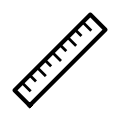

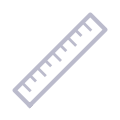

In [12]:
makefig()
tr = transforms.Affine2D().rotate_deg(45)

plt.plot([0, 5, 5, 0, 0], [0, 0, 1, 1, 0], lw=3, color='black', transform=tr + plt.gca().transData)
for i in range(1,5):
    plt.plot([i, i], [1, .65], color='black', lw=2, transform=tr + plt.gca().transData)
for i in np.arange(0.5,5.5):
    plt.plot([i, i], [1, .5], color='black', lw=2, transform=tr + plt.gca().transData)
pngstrings['ruler'] = tobase64()

makefig()
plt.plot([0, 5, 5, 0, 0], [0, 0, 1, 1, 0], lw=3, color=darkmode, transform=tr + plt.gca().transData)
for i in range(1,5):
    plt.plot([i, i], [1, .65], color=darkmode, lw=2, transform=tr + plt.gca().transData)
for i in np.arange(0.5,5.5):
    plt.plot([i, i], [1, .5], color=darkmode, lw=2, transform=tr + plt.gca().transData)
pngstrings['ruler_dark'] = tobase64()

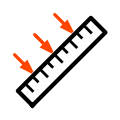

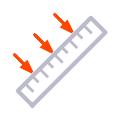

In [13]:
makefig()
tr = transforms.Affine2D().rotate_deg(45)

plt.plot([0, 5, 5, 0, 0], [0, 0, 1, 1, 0], lw=3, color='black', transform=tr + plt.gca().transData)
for i in range(1,5):
    plt.plot([i, i], [1, .65], color='black', lw=2, transform=tr + plt.gca().transData)
for i in np.arange(0.5,5.5):
    plt.plot([i, i], [1, .5], color='black', lw=2, transform=tr + plt.gca().transData)
    
plt.arrow(1.125, 2.35, dx=0, dy=-1.2, lw=2, transform=tr + plt.gca().transData, color=color, capstyle='round', length_includes_head=True, head_width=.35)
plt.arrow(2.5, 2.35, dx=0, dy=-1.2, lw=2, transform=tr + plt.gca().transData, color=color, capstyle='round', length_includes_head=True, head_width=.35)
plt.arrow(3.875, 2.35, dx=0, dy=-1.2, lw=2, transform=tr + plt.gca().transData, color=color, capstyle='round', length_includes_head=True, head_width=.35)
    
pngstrings['rulersweep'] = tobase64()


makefig()
plt.plot([0, 5, 5, 0, 0], [0, 0, 1, 1, 0], lw=3, color=darkmode, transform=tr + plt.gca().transData)
for i in range(1,5):
    plt.plot([i, i], [1, .65], color=darkmode, lw=2, transform=tr + plt.gca().transData)
for i in np.arange(0.5,5.5):
    plt.plot([i, i], [1, .5], color=darkmode, lw=2, transform=tr + plt.gca().transData)
plt.arrow(1.125, 2.35, dx=0, dy=-1.2, lw=2, transform=tr + plt.gca().transData, color=color, capstyle='round', length_includes_head=True, head_width=.35)
plt.arrow(2.5, 2.35, dx=0, dy=-1.2, lw=2, transform=tr + plt.gca().transData, color=color, capstyle='round', length_includes_head=True, head_width=.35)
plt.arrow(3.875, 2.35, dx=0, dy=-1.2, lw=2, transform=tr + plt.gca().transData, color=color, capstyle='round', length_includes_head=True, head_width=.35)
pngstrings['rulersweep_dark'] = tobase64()


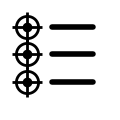

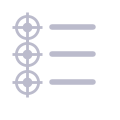

In [14]:
makefig()
plt.plot([0],[1], marker='o', mec='black', mfc='none', markersize=16, mew=2)
plt.plot([0],[1], marker='o', color='black', markersize=6)
plt.plot([0],[1], marker='+', color='black', markersize=22, mew=2)
plt.plot([.75, 2], [1,1], color='black', lw=4, solid_capstyle='round')
plt.plot([0],[.75], marker='o', mec='black', mfc='none', markersize=16, mew=2)
plt.plot([0],[.75], marker='o', color='black', markersize=6)
plt.plot([0],[.75], marker='+', color='black', markersize=22, mew=2)
plt.plot([.75, 2], [.75,.75], color='black', lw=4, solid_capstyle='round')
plt.plot([0],[.5], marker='o', mec='black', mfc='none', markersize=16, mew=2)
plt.plot([0],[.5], marker='o', color='black', markersize=6)
plt.plot([0],[.5], marker='+', color='black', markersize=22, mew=2)
plt.plot([.75, 2], [.5,.5], color='black', lw=4, solid_capstyle='round')
plt.xlim(-.5,2.5)
plt.ylim(.25, 1.15)
pngstrings['targetlist'] = tobase64()

makefig()
plt.plot([0],[1], marker='o', mec=darkmode, mfc='none', markersize=16, mew=2)
plt.plot([0],[1], marker='o', color=darkmode, markersize=6)
plt.plot([0],[1], marker='+', color=darkmode, markersize=22, mew=2)
plt.plot([.75, 2], [1,1], color=darkmode, lw=4, solid_capstyle='round')
plt.plot([0],[.75], marker='o', mec=darkmode, mfc='none', markersize=16, mew=2)
plt.plot([0],[.75], marker='o', color=darkmode, markersize=6)
plt.plot([0],[.75], marker='+', color=darkmode, markersize=22, mew=2)
plt.plot([.75, 2], [.75,.75], color=darkmode, lw=4, solid_capstyle='round')
plt.plot([0],[.5], marker='o', mec=darkmode, mfc='none', markersize=16, mew=2)
plt.plot([0],[.5], marker='o', color=darkmode, markersize=6)
plt.plot([0],[.5], marker='+', color=darkmode, markersize=22, mew=2)
plt.plot([.75, 2], [.5,.5], color=darkmode, lw=4, solid_capstyle='round')
plt.xlim(-.5,2.5)
plt.ylim(.25, 1.15)
pngstrings['targetlist_dark'] = tobase64()

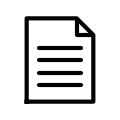

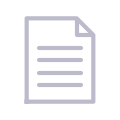

In [15]:
makefig()
plt.plot([0, 0, 6, 8, 8, 0], [0, 10, 10, 8, 0, 0], solid_joinstyle='round', lw=3, color='black')
plt.plot([6, 6, 8], [10, 8, 8], lw=3, color='black', solid_joinstyle='round', solid_capstyle='butt')
plt.plot([1.5, 6.5], [2,2], color='black', lw=3, solid_capstyle='round')
plt.plot([1.5, 6.5], [3.5,3.5], color='black', lw=3, solid_capstyle='round')
plt.plot([1.5, 6.5], [5,5], color='black', lw=3, solid_capstyle='round')
plt.plot([1.5, 6.5], [6.5,6.5], color='black', lw=3, solid_capstyle='round')
plt.xlim(-2,10)
plt.ylim(-1,11)
pngstrings['report'] = tobase64()

makefig()
plt.plot([0, 0, 6, 8, 8, 0], [0, 10, 10, 8, 0, 0], solid_joinstyle='round', lw=3, color=darkmode)
plt.plot([6, 6, 8], [10, 8, 8], lw=3, color=darkmode, solid_joinstyle='round', solid_capstyle='butt')
plt.plot([1.5, 6.5], [2,2], color=darkmode, lw=3, solid_capstyle='round')
plt.plot([1.5, 6.5], [3.5,3.5], color=darkmode, lw=3, solid_capstyle='round')
plt.plot([1.5, 6.5], [5,5], color=darkmode, lw=3, solid_capstyle='round')
plt.plot([1.5, 6.5], [6.5,6.5], color=darkmode, lw=3, solid_capstyle='round')
plt.xlim(-2,10)
plt.ylim(-1,11)
pngstrings['report_dark'] = tobase64()

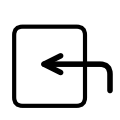

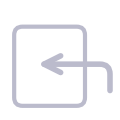

In [16]:
makefig()
bb = mtransforms.Bbox([[.05,.05], [.7, .8]])
p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                         abs(bb.width), abs(bb.height),
                         boxstyle="round,pad=0.1",
                         lw=3,
                         fc='none',
                         ec='black')
plt.annotate('', (.2,.45), (1.1, .1),
            arrowprops={'arrowstyle':'->', 'lw':4,  'mutation_scale': 30, 'connectionstyle':'angle,angleA=90,angleB=0,rad=10'})
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.gca().add_patch(p_bbox);
pngstrings['loaddat'] = tobase64()


makefig()
p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                         abs(bb.width), abs(bb.height),
                         boxstyle="round,pad=0.1",
                         lw=3,
                         fc='none',
                         ec=darkmode)
plt.annotate('', (.2,.45), (1.1, .1),
            arrowprops={'arrowstyle':'->', 'lw':4,  'color': darkmode, 'mutation_scale': 30, 'connectionstyle':'angle,angleA=90,angleB=0,rad=10'})
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.gca().add_patch(p_bbox);
pngstrings['loaddat_dark'] = tobase64()

C:\Users\cjdelke\AppData\Local\Temp\ipykernel_16252\1024853985.py:26: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow(2.05, 1.1, dx=-1, dy=0, lw=2, head_width=.2, color=darkmode, facecolor=darkmode)


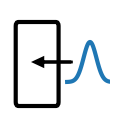

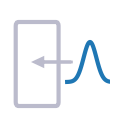

In [17]:
makefig()
bb = mtransforms.Bbox([[.2,.1], [1.5, 2.0]])
p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                             abs(bb.width), abs(bb.height),
                             boxstyle="round,pad=0.1",
                            lw=3,
                            fc='none',
                             ec='black')
xx = np.linspace(-.8,.8,num=100)
yy = np.exp(-(xx**2)*10) + .6
plt.plot(xx+2.7,yy, lw=3)
plt.arrow(2.05, 1.1, dx=-1, dy=0, lw=2, head_width=.2, facecolor='black')
plt.xlim(-.1,3.4)
plt.ylim(-.1,2.4)
plt.gca().add_patch(p_bbox)
pngstrings['loaddist'] = tobase64()

makefig()
p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                         abs(bb.width), abs(bb.height),
                         boxstyle="round,pad=0.1",
                         lw=3,
                         fc='none',
                         ec=darkmode)
plt.plot(xx+2.7,yy, lw=3)
plt.arrow(2.05, 1.1, dx=-1, dy=0, lw=2, head_width=.2, color=darkmode, facecolor=darkmode)
plt.xlim(-.1,3.4)
plt.ylim(-.1,2.4)
plt.gca().add_patch(p_bbox)
pngstrings['loaddist_dark'] = tobase64()

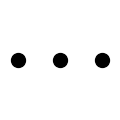

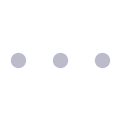

In [18]:
makefig()
plt.plot([0,1,2],[0,0,0], marker='o', ls='', markersize=10, color='black')
plt.xlim(-.2, 2.2)
pngstrings['more'] = tobase64()

makefig()
plt.plot([0,1,2],[0,0,0], marker='o', ls='', markersize=10, color=darkmode)
plt.xlim(-.2, 2.2)
pngstrings['more_dark'] = tobase64()

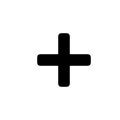

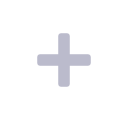

In [19]:
makefig()
plt.plot(0,0, marker='$+$', ls='', markersize=40, mew=4, color='black')
plt.xlim(-.2, .2)
pngstrings['add'] = tobase64()

makefig()
plt.plot(0,0, marker='$+$', ls='', markersize=40, mew=4, color=darkmode)
plt.xlim(-.2, .2)
pngstrings['add_dark'] = tobase64()

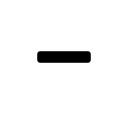

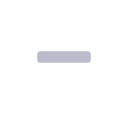

In [20]:
makefig()
plt.plot(0,0, marker='$-$', ls='', markersize=40, mew=4, color='black')
plt.xlim(-.2, .2)
plt.ylim(-.15, .2)
pngstrings['remove'] = tobase64()

makefig()
plt.plot(0,0, marker='$-$', ls='', markersize=40, mew=4, color=darkmode)
plt.xlim(-.2, .2)
plt.ylim(-.15, .2)
pngstrings['remove_dark'] = tobase64()

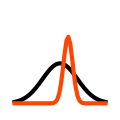

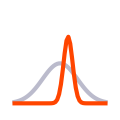

In [21]:
makefig()
x = np.linspace(-4.5,4.5,50)
y = 0.6 * np.exp(-x**2/6)
y2 = np.exp(-(x-.8)**2/.4)
plt.plot(x, y, lw=3, color='black')
plt.plot(x, y2, lw=3, color=color)

plt.ylim(-.1, 1.4);
pngstrings['dists'] = tobase64()

makefig()
plt.plot(x, y, lw=3, color=darkmode)
plt.plot(x, y2, lw=3, color=color)
plt.ylim(-.1, 1.4);
pngstrings['dists_dark'] = tobase64()

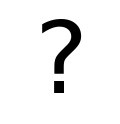

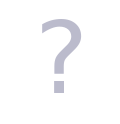

In [22]:
makefig()
plt.text(0, 0, '?', fontsize=72)
plt.ylim(-.1, .5);
plt.xlim(-.2, .6);
pngstrings['help'] = tobase64()

makefig()
plt.text(0, 0, '?', color=darkmode, fontsize=72)
plt.ylim(-.1, .5);
plt.xlim(-.2, .6);
pngstrings['help_dark'] = tobase64()

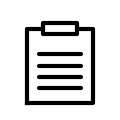

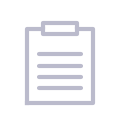

In [23]:
makefig()
plt.plot([0, 0,   2,  2, 6,   6, 8, 8, 8, 0],
         [0, 10, 10, 10.7, 10.7, 10, 10, 8, 0, 0],
         solid_joinstyle='round', lw=3, color='black')
plt.plot([ 2, 2, 6, 6],
         [10, 9.3, 9.3, 10], solid_joinstyle='round', lw=3, color='black')
plt.plot([1.5, 6.5], [2,2], color='black', lw=3, solid_capstyle='round')
plt.plot([1.5, 6.5], [3.5,3.5], color='black', lw=3, solid_capstyle='round')
plt.plot([1.5, 6.5], [5,5], color='black', lw=3, solid_capstyle='round')
plt.plot([1.5, 6.5], [6.5,6.5], color='black', lw=3, solid_capstyle='round')
plt.xlim(-2,10)
plt.ylim(-1,12.5)
pngstrings['clipboard'] = tobase64()

makefig()
plt.plot([0, 0,   2,  2, 6,   6, 8, 8, 8, 0],
         [0, 10, 10, 10.7, 10.7, 10, 10, 8, 0, 0],
         solid_joinstyle='round', lw=3, color=darkmode)
plt.plot([ 2, 2, 6, 6],
         [10, 9.3, 9.3, 10], solid_joinstyle='round', lw=3, color=darkmode)
plt.plot([1.5, 6.5], [2,2], color=darkmode, lw=3, solid_capstyle='round')
plt.plot([1.5, 6.5], [3.5,3.5], color=darkmode, lw=3, solid_capstyle='round')
plt.plot([1.5, 6.5], [5,5], color=darkmode, lw=3, solid_capstyle='round')
plt.plot([1.5, 6.5], [6.5,6.5], color=darkmode, lw=3, solid_capstyle='round')
plt.xlim(-2,10)
plt.ylim(-1,12.5)
pngstrings['clipboard_dark'] = tobase64()

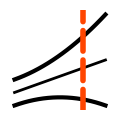

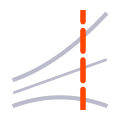

In [24]:
makefig()
np.random.seed(142941)

x = np.linspace(0, 1, num=20)
y = x/4
yp = y + (x/2)**2 + .1
ym = y - (x/2)**2 - .1

plt.plot(x, y, color='black', lw=2)
plt.plot(x, yp, color='black', ls='-', lw=3, dash_capstyle='round')
plt.plot(x, ym, color='black', ls='-', lw=3, dash_capstyle='round')
plt.axvline(.75, color=color, lw=4, ls='--', dash_capstyle='round')
pngstrings['interval'] = tobase64()

makefig()
plt.plot(x, y, color=darkmode, lw=2)
plt.plot(x, yp, color=darkmode, ls='-', lw=3, dash_capstyle='round')
plt.plot(x, ym, color=darkmode, ls='-', lw=3, dash_capstyle='round')
plt.axvline(.75, color=color, lw=4, ls='--', dash_capstyle='round')
pngstrings['interval_dark'] = tobase64()

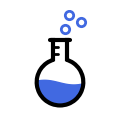

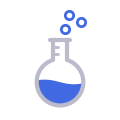

In [25]:
makefig(frame=False)
plt.gca().add_patch(Arc((0, 0), width=1, height=1, theta1=105, theta2=75, lw=3))
plt.plot([.15, .15], [.5, .9], lw=3, color='black')
plt.plot([-.15, -.15], [.5, .9], lw=3, color='black')
plt.plot([-.21, .21], [.9, .9], lw=3, color='black', solid_capstyle='round')
plt.plot([-.15, -.05], [.75, .75], lw=2, color='black', solid_capstyle='round')
plt.plot([-.15, -.05], [.6, .6], lw=2, color='black', solid_capstyle='round')
xx = np.linspace(-.5, .5)
yy = np.sin(xx*5-3)/20
y2 = -np.sqrt(.5**2-xx**2)
plt.fill_between(xx, yy, y2=y2, color=blue, zorder=0)
plt.plot(.45, 1.3, marker='o', mfc='none', color=blue, mew=2)
plt.plot(.1, 1.15, marker='o', mfc='none', color=blue, mew=2)
plt.plot(.2, 1.45, marker='o', mfc='none', color=blue, mew=2)
plt.axis('equal');
pngstrings['wizard'] = tobase64()

makefig(frame=False)
plt.gca().add_patch(Arc((0, 0), width=1, height=1, theta1=105, theta2=75, lw=3, color=darkmode))
plt.plot([.15, .15], [.5, .9], lw=3, color=darkmode)
plt.plot([-.15, -.15], [.5, .9], lw=3, color=darkmode)
plt.plot([-.21, .21], [.9, .9], lw=3, color=darkmode, solid_capstyle='round')
plt.plot([-.15, -.05], [.75, .75], lw=2, color=darkmode, solid_capstyle='round')
plt.plot([-.15, -.05], [.6, .6], lw=2, color=darkmode, solid_capstyle='round')
xx = np.linspace(-.5, .5)
yy = np.sin(xx*5-3)/20
y2 = -np.sqrt(.5**2-xx**2)
plt.fill_between(xx, yy, y2=y2, color=blue, zorder=0)
plt.plot(.45, 1.3, marker='o', mfc='none', color=blue, mew=2)
plt.plot(.1, 1.15, marker='o', mfc='none', color=blue, mew=2)
plt.plot(.2, 1.45, marker='o', mfc='none', color=blue, mew=2)
plt.axis('equal');
pngstrings['wizard_dark'] = tobase64()

In [26]:
with open('PSLcal_logo.png', 'rb') as f:
    logo = f.read()

with open('SNL_Horizontal_Black_Blue.png', 'rb') as f:
    logosnl = f.read()
    
with open('snllogo.py', 'w') as f:
    f.write('# snllogo.py autogenerated from icons.ipynb. Icon stored in PNG/base64.\n\n')
    f.write('logo = {}'.format(base64.b64encode(logo)))
    f.write('\n\n')
    f.write('logosnl = {}'.format(base64.b64encode(logosnl)))

In [27]:
with open('pngs.py', 'w') as f:
    f.write('# icons.py autogenerated from icons.ipynb\n\n')
    for k, v in pngstrings.items():
        f.write("{} = {}".format(k, v))
        f.write('\n\n')